In [1]:
import keras
from keras.datasets import cifar10

# load the pre-shuffled train and test data
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

Using TensorFlow backend.


Untaring file...


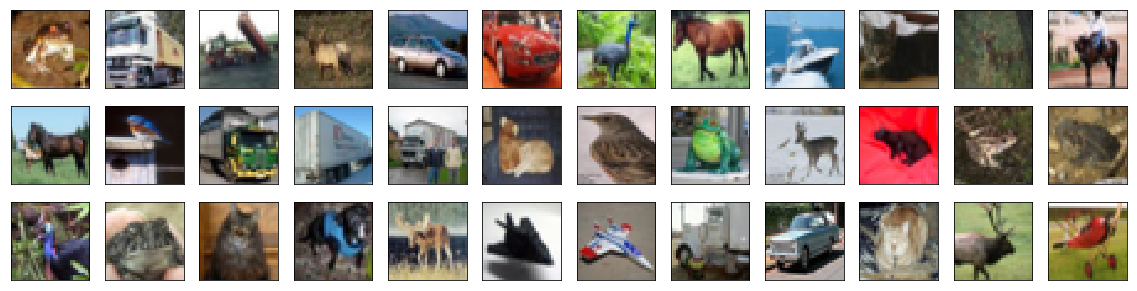

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

fig = plt.figure(figsize=(20,5))
for i in range(36):
    ax = fig.add_subplot(3, 12, i + 1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(x_train[i]))

In [16]:
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(50000, 32, 32, 3) (50000, 1)
(10000, 32, 32, 3) (10000, 1)


In [17]:
# rescale [0,255] --> [0,1]
x_train = x_train.astype('float32')/255
x_test = x_test.astype('float32')/255

In [22]:
from keras.utils import np_utils

# one-hot encode the labels
num_classes = len(np.unique(y_train))
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

# break training set into training and validation sets
(x_train, x_valid) = x_train[5000:], x_train[:5000]
(y_train, y_valid) = y_train[5000:], y_train[:5000]

# print shape of training set
print('x_train shape:', x_train.shape)

# print number of training, validation, and test images
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')
print(x_valid.shape[0], 'validation samples')

x_train shape: (45000, 32, 32, 3)
45000 train samples
10000 test samples
5000 validation samples


In [23]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential()
model.add(Conv2D(filters=16, kernel_size=2, padding='same', activation='relu', 
                        input_shape=(32, 32, 3)))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=32, kernel_size=2, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=64, kernel_size=2, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(500, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(10, activation='softmax'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 16)        208       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 32)        2080      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 8, 8, 32)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 8, 8, 64)          8256      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 4, 4, 64)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 4, 4, 64)          0         
__________

In [24]:
# compile the model
model.compile(loss='categorical_crossentropy', optimizer='rmsprop', 
                  metrics=['accuracy'])

In [25]:
from keras.callbacks import ModelCheckpoint   

# train the model
checkpointer = ModelCheckpoint(filepath='model.weights.best.hdf5', verbose=1, 
                               save_best_only=True)
hist = model.fit(x_train, y_train, batch_size=32, epochs=100,
          validation_data=(x_valid, y_valid), callbacks=[checkpointer], 
          verbose=2, shuffle=True)

Train on 45000 samples, validate on 5000 samples
Epoch 1/100
Epoch 00000: val_loss improved from inf to 1.41447, saving model to model.weights.best.hdf5
38s - loss: 1.5970 - acc: 0.4212 - val_loss: 1.4145 - val_acc: 0.4782
Epoch 2/100
Epoch 00001: val_loss improved from 1.41447 to 1.27878, saving model to model.weights.best.hdf5
38s - loss: 1.3191 - acc: 0.5319 - val_loss: 1.2788 - val_acc: 0.5448
Epoch 3/100
Epoch 00002: val_loss improved from 1.27878 to 1.21432, saving model to model.weights.best.hdf5
39s - loss: 1.2378 - acc: 0.5644 - val_loss: 1.2143 - val_acc: 0.5922
Epoch 4/100
Epoch 00003: val_loss improved from 1.21432 to 1.11363, saving model to model.weights.best.hdf5
40s - loss: 1.2167 - acc: 0.5789 - val_loss: 1.1136 - val_acc: 0.6114
Epoch 5/100
Epoch 00004: val_loss did not improve
37s - loss: 1.2203 - acc: 0.5806 - val_loss: 1.1570 - val_acc: 0.6050
Epoch 6/100
Epoch 00005: val_loss did not improve
37s - loss: 1.2444 - acc: 0.5765 - val_loss: 1.1625 - val_acc: 0.5998
Epo

Epoch 00066: val_loss did not improve
37s - loss: 1.9370 - acc: 0.2856 - val_loss: 2.0370 - val_acc: 0.3274
Epoch 68/100
Epoch 00067: val_loss did not improve
37s - loss: 1.9538 - acc: 0.2793 - val_loss: 1.8379 - val_acc: 0.2876
Epoch 69/100
Epoch 00068: val_loss did not improve
37s - loss: 1.9593 - acc: 0.2801 - val_loss: 1.7402 - val_acc: 0.3560
Epoch 70/100
Epoch 00069: val_loss did not improve
37s - loss: 1.9523 - acc: 0.2774 - val_loss: 1.7066 - val_acc: 0.3350
Epoch 71/100
Epoch 00070: val_loss did not improve
37s - loss: 1.9545 - acc: 0.2699 - val_loss: 1.9054 - val_acc: 0.3364
Epoch 72/100
Epoch 00071: val_loss did not improve
37s - loss: 1.9527 - acc: 0.2722 - val_loss: 1.9418 - val_acc: 0.2940
Epoch 73/100
Epoch 00072: val_loss did not improve
37s - loss: 1.9633 - acc: 0.2659 - val_loss: 2.0068 - val_acc: 0.2380
Epoch 74/100
Epoch 00073: val_loss did not improve
36s - loss: 1.9731 - acc: 0.2638 - val_loss: 1.7681 - val_acc: 0.3408
Epoch 75/100
Epoch 00074: val_loss did not im

In [26]:
# load the weights that yielded the best validation accuracy
model.load_weights('model.weights.best.hdf5')

In [27]:
# evaluate and print test accuracy
score = model.evaluate(x_test, y_test, verbose=0)
print('\n', 'Test accuracy:', score[1])


 Test accuracy: 0.5926


In [28]:
# get predictions on the test set
y_hat = model.predict(x_test)

# define text labels (source: https://www.cs.toronto.edu/~kriz/cifar.html)
cifar10_labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

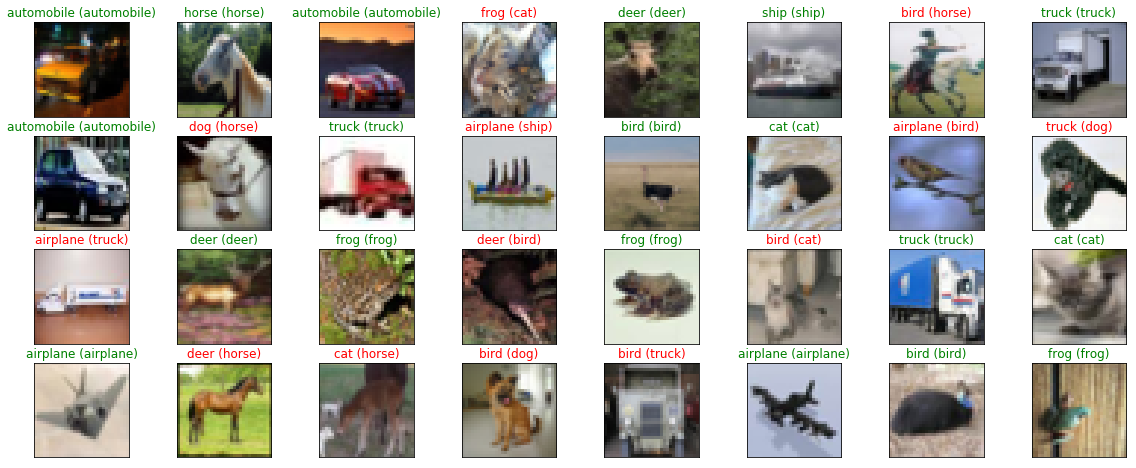

In [29]:
# plot a random sample of test images, their predicted labels, and ground truth
fig = plt.figure(figsize=(20, 8))
for i, idx in enumerate(np.random.choice(x_test.shape[0], size=32, replace=False)):
    ax = fig.add_subplot(4, 8, i + 1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(x_test[idx]))
    pred_idx = np.argmax(y_hat[idx])
    true_idx = np.argmax(y_test[idx])
    ax.set_title("{} ({})".format(cifar10_labels[pred_idx], cifar10_labels[true_idx]),
                 color=("green" if pred_idx == true_idx else "red"))

In [30]:
# Create and Configure Augmented Image Generator

from keras.preprocessing.image import ImageDataGenerator

# create and configure augmented image generator
datagen_train = ImageDataGenerator(
    width_shift_range=0.1,  # randomly shift images horizontally (10% of total width)
    height_shift_range=0.1,  # randomly shift images vertically (10% of total height)
    horizontal_flip=True) # randomly flip images horizontally

# create and configure augmented image generator
datagen_valid = ImageDataGenerator(
    width_shift_range=0.1,  # randomly shift images horizontally (10% of total width)
    height_shift_range=0.1,  # randomly shift images vertically (10% of total height)
    horizontal_flip=True) # randomly flip images horizontally

# fit augmented image generator on data
datagen_train.fit(x_train)
datagen_valid.fit(x_valid)

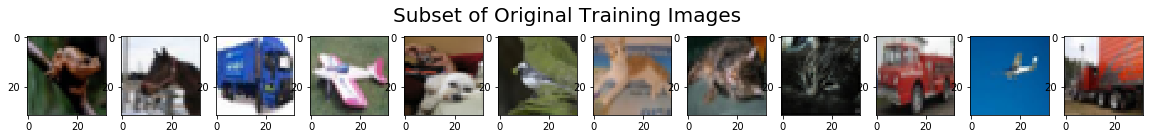

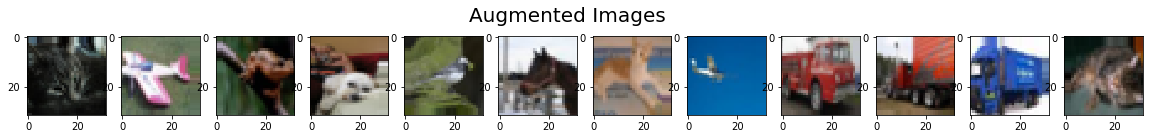

In [31]:
# Visualize Original and Augmented Images

import matplotlib.pyplot as plt

# take subset of training data
x_train_subset = x_train[:12]

# visualize subset of training data
fig = plt.figure(figsize=(20,2))
for i in range(0, len(x_train_subset)):
    ax = fig.add_subplot(1, 12, i+1)
    ax.imshow(x_train_subset[i])
fig.suptitle('Subset of Original Training Images', fontsize=20)
plt.show()

# visualize augmented images
fig = plt.figure(figsize=(20,2))
for x_batch in datagen_train.flow(x_train_subset, batch_size=12):
    for i in range(0, 12):
        ax = fig.add_subplot(1, 12, i+1)
        ax.imshow(x_batch[i])
    fig.suptitle('Augmented Images', fontsize=20)
    plt.show()
    break

In [33]:
model = Sequential()
model.add(Conv2D(filters=16, kernel_size=2, padding='same', activation='relu', 
                        input_shape=(32, 32, 3)))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=32, kernel_size=2, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=64, kernel_size=2, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(500, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(10, activation='softmax'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 32, 32, 16)        208       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 16, 16, 16)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 16, 16, 32)        2080      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 8, 8, 32)          0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 8, 8, 64)          8256      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 4, 4, 64)          0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 4, 4, 64)          0         
__________

In [34]:
# compile the model
model.compile(loss='categorical_crossentropy', optimizer='rmsprop', 
                  metrics=['accuracy'])

In [35]:
batch_size = 32
epochs = 100

# train the model
checkpointer = ModelCheckpoint(filepath='aug_model.weights.best.hdf5', verbose=1, 
                               save_best_only=True)
model.fit_generator(datagen_train.flow(x_train, y_train, batch_size=batch_size),
                    steps_per_epoch=x_train.shape[0] // batch_size,
                    epochs=epochs, verbose=2, callbacks=[checkpointer],
                    validation_data=datagen_valid.flow(x_valid, y_valid, batch_size=batch_size),
                    validation_steps=x_valid.shape[0] // batch_size)

Epoch 1/100
Epoch 00000: val_loss improved from inf to 1.55359, saving model to aug_model.weights.best.hdf5
50s - loss: 1.7466 - acc: 0.3669 - val_loss: 1.5536 - val_acc: 0.4581
Epoch 2/100
Epoch 00001: val_loss improved from 1.55359 to 1.50132, saving model to aug_model.weights.best.hdf5
50s - loss: 1.5931 - acc: 0.4340 - val_loss: 1.5013 - val_acc: 0.4396
Epoch 3/100
Epoch 00002: val_loss improved from 1.50132 to 1.39142, saving model to aug_model.weights.best.hdf5
50s - loss: 1.5719 - acc: 0.4453 - val_loss: 1.3914 - val_acc: 0.5161
Epoch 4/100
Epoch 00003: val_loss did not improve
52s - loss: 1.5956 - acc: 0.4416 - val_loss: 1.4338 - val_acc: 0.4911
Epoch 5/100
Epoch 00004: val_loss did not improve
52s - loss: 1.6488 - acc: 0.4271 - val_loss: 1.4805 - val_acc: 0.4875
Epoch 6/100
Epoch 00005: val_loss did not improve
48s - loss: 1.7005 - acc: 0.4127 - val_loss: 1.4827 - val_acc: 0.4851
Epoch 7/100
Epoch 00006: val_loss did not improve
49s - loss: 1.7268 - acc: 0.4002 - val_loss: 1.5

Epoch 00067: val_loss did not improve
48s - loss: 1.9937 - acc: 0.2536 - val_loss: 1.8020 - val_acc: 0.3108
Epoch 69/100
Epoch 00068: val_loss did not improve
48s - loss: 1.9926 - acc: 0.2564 - val_loss: 1.8657 - val_acc: 0.3122
Epoch 70/100
Epoch 00069: val_loss did not improve
48s - loss: 1.9958 - acc: 0.2489 - val_loss: 1.8501 - val_acc: 0.3088
Epoch 71/100
Epoch 00070: val_loss did not improve
48s - loss: 1.9914 - acc: 0.2528 - val_loss: 2.0092 - val_acc: 0.2430
Epoch 72/100
Epoch 00071: val_loss did not improve
48s - loss: 1.9844 - acc: 0.2548 - val_loss: 1.8509 - val_acc: 0.2810
Epoch 73/100
Epoch 00072: val_loss did not improve
48s - loss: 1.9849 - acc: 0.2568 - val_loss: 1.8829 - val_acc: 0.2717
Epoch 74/100
Epoch 00073: val_loss did not improve
48s - loss: 1.9866 - acc: 0.2546 - val_loss: 1.8390 - val_acc: 0.3013
Epoch 75/100
Epoch 00074: val_loss did not improve
48s - loss: 1.9797 - acc: 0.2544 - val_loss: 1.8397 - val_acc: 0.3102
Epoch 76/100
Epoch 00075: val_loss did not im

In [36]:
# load the weights that yielded the best validation accuracy
model.load_weights('aug_model.weights.best.hdf5')

In [37]:
# evaluate and print test accuracy
score = model.evaluate(x_test, y_test, verbose=0)
print('\n', 'Test accuracy:', score[1])


 Test accuracy: 0.531
